In [1]:
import pandas_datareader as pdr
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime, timedelta

In [2]:
start = datetime.now() + timedelta(weeks=-60)
end = datetime.now()

df = pdr.DataReader('PPIACO', 'fred', start, end)
df = df.rename(columns={'PPIACO':'PPI'})
df['Monthly % Change'] = 100*df['PPI'].pct_change(axis=0)
df = df.round(decimals=2)

display(df)

,PPI,Monthly % Change
DATE,,
2020-04-01,185.5,NaN
2020-05-01,188.6,1.67
2020-06-01,191.2,1.38
2020-07-01,193.0,0.94
2020-08-01,194.3,0.67
2020-09-01,195.5,0.62
2020-10-01,196.5,0.51
2020-11-01,198.3,0.92
2020-12-01,200.5,1.11


In [3]:
percent_change_YoY = 100*(df['PPI'].iloc[-1]/df['PPI'].iloc[0]-1).round(decimals=4)

display(percent_change_YoY)

17.25

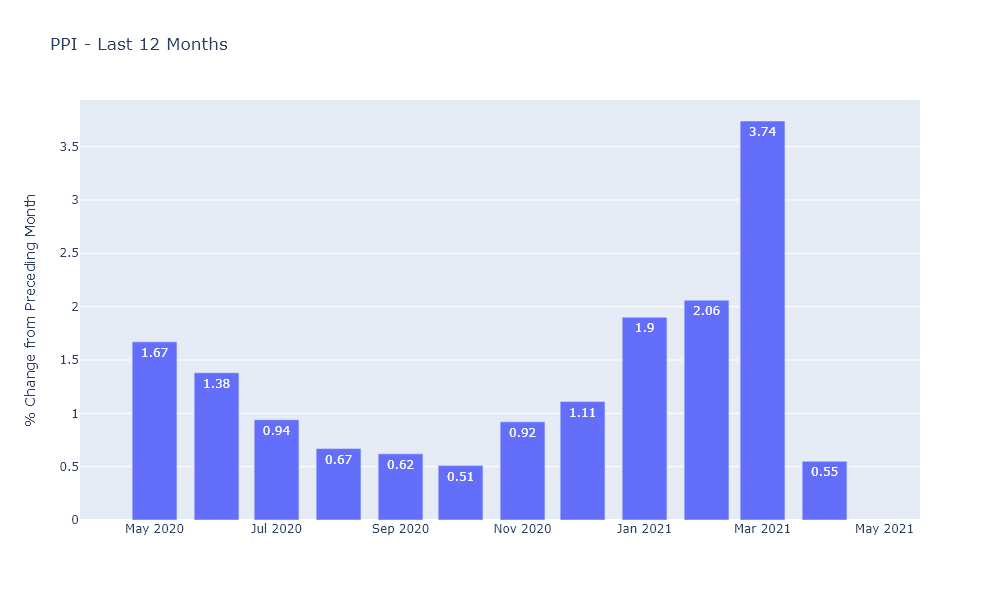

In [4]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df.index, y=df['Monthly % Change'],
                     text=df['Monthly % Change']))

fig.update_traces(textposition='inside')
fig.update_yaxes(title_text='% Change from Preceding Month')
fig.update_layout(title='PPI - Last 12 Months',
                  xaxis_tickangle=0,
                  xaxis_range=[datetime.now() + timedelta(weeks=-60),
                               datetime.now()])

fig.show(renderer='png', width=1000, height=600)